In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
df.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [19]:
df.drop_duplicates(keep=False, inplace=True)

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

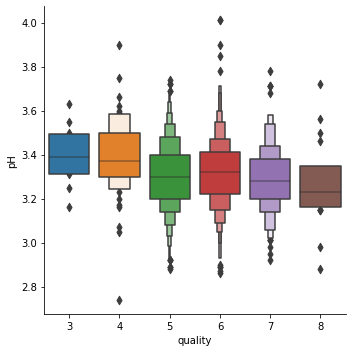

In [7]:
sns.catplot(data = df, x = 'quality', y = 'pH', kind= 'boxen')

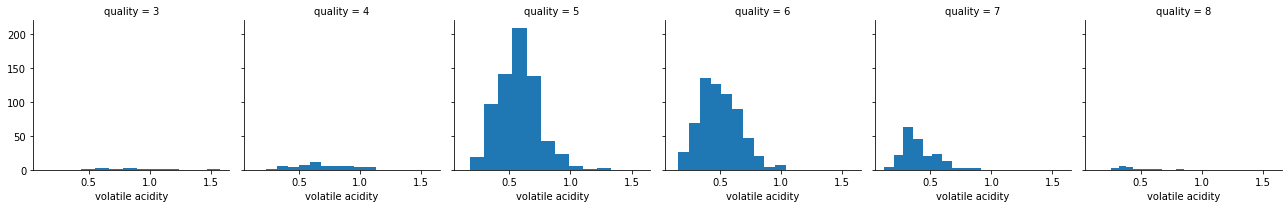

In [9]:
q = sns.FacetGrid(df, col = 'quality')
q.map(plt.hist, 'volatile acidity')

<AxesSubplot:>

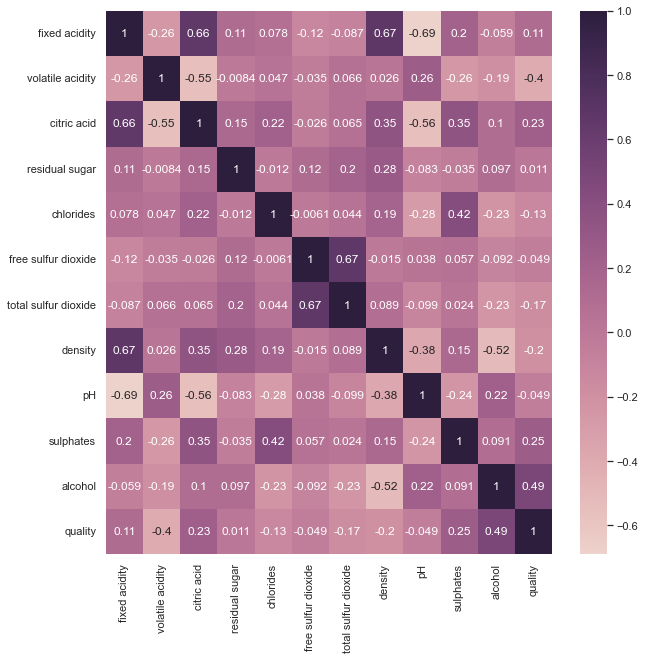

In [22]:
sns.set(rc = {'figure.figsize':(10,10)})
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

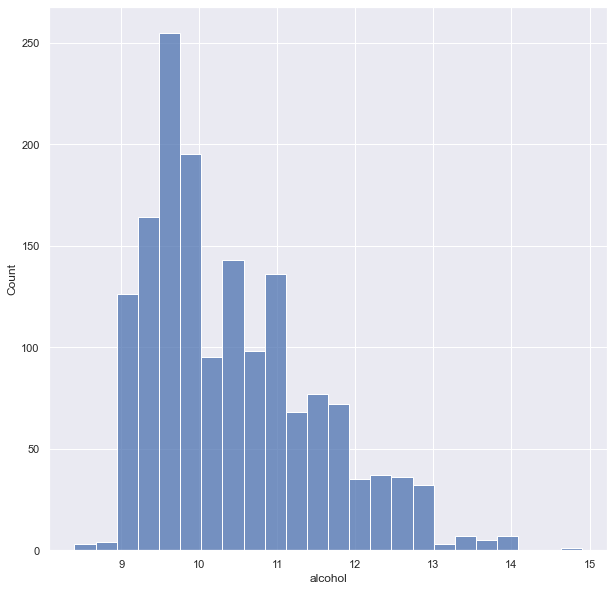

In [16]:
sns.histplot(data = df, x = 'alcohol')

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

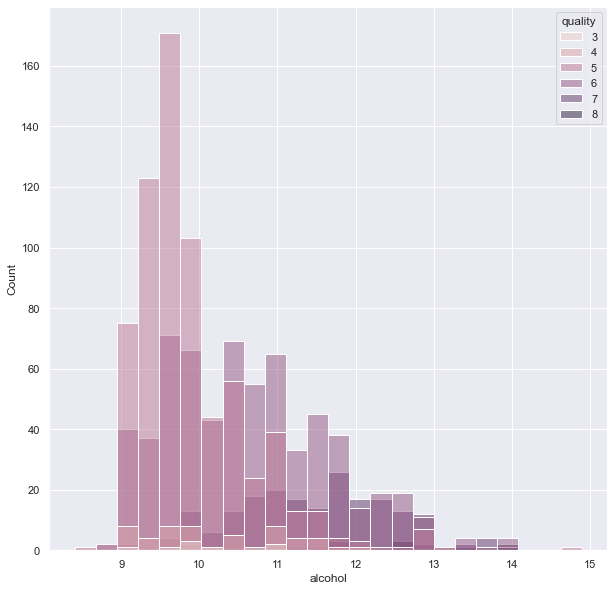

In [17]:
sns.histplot(data = df, x = 'alcohol', hue = 'quality')

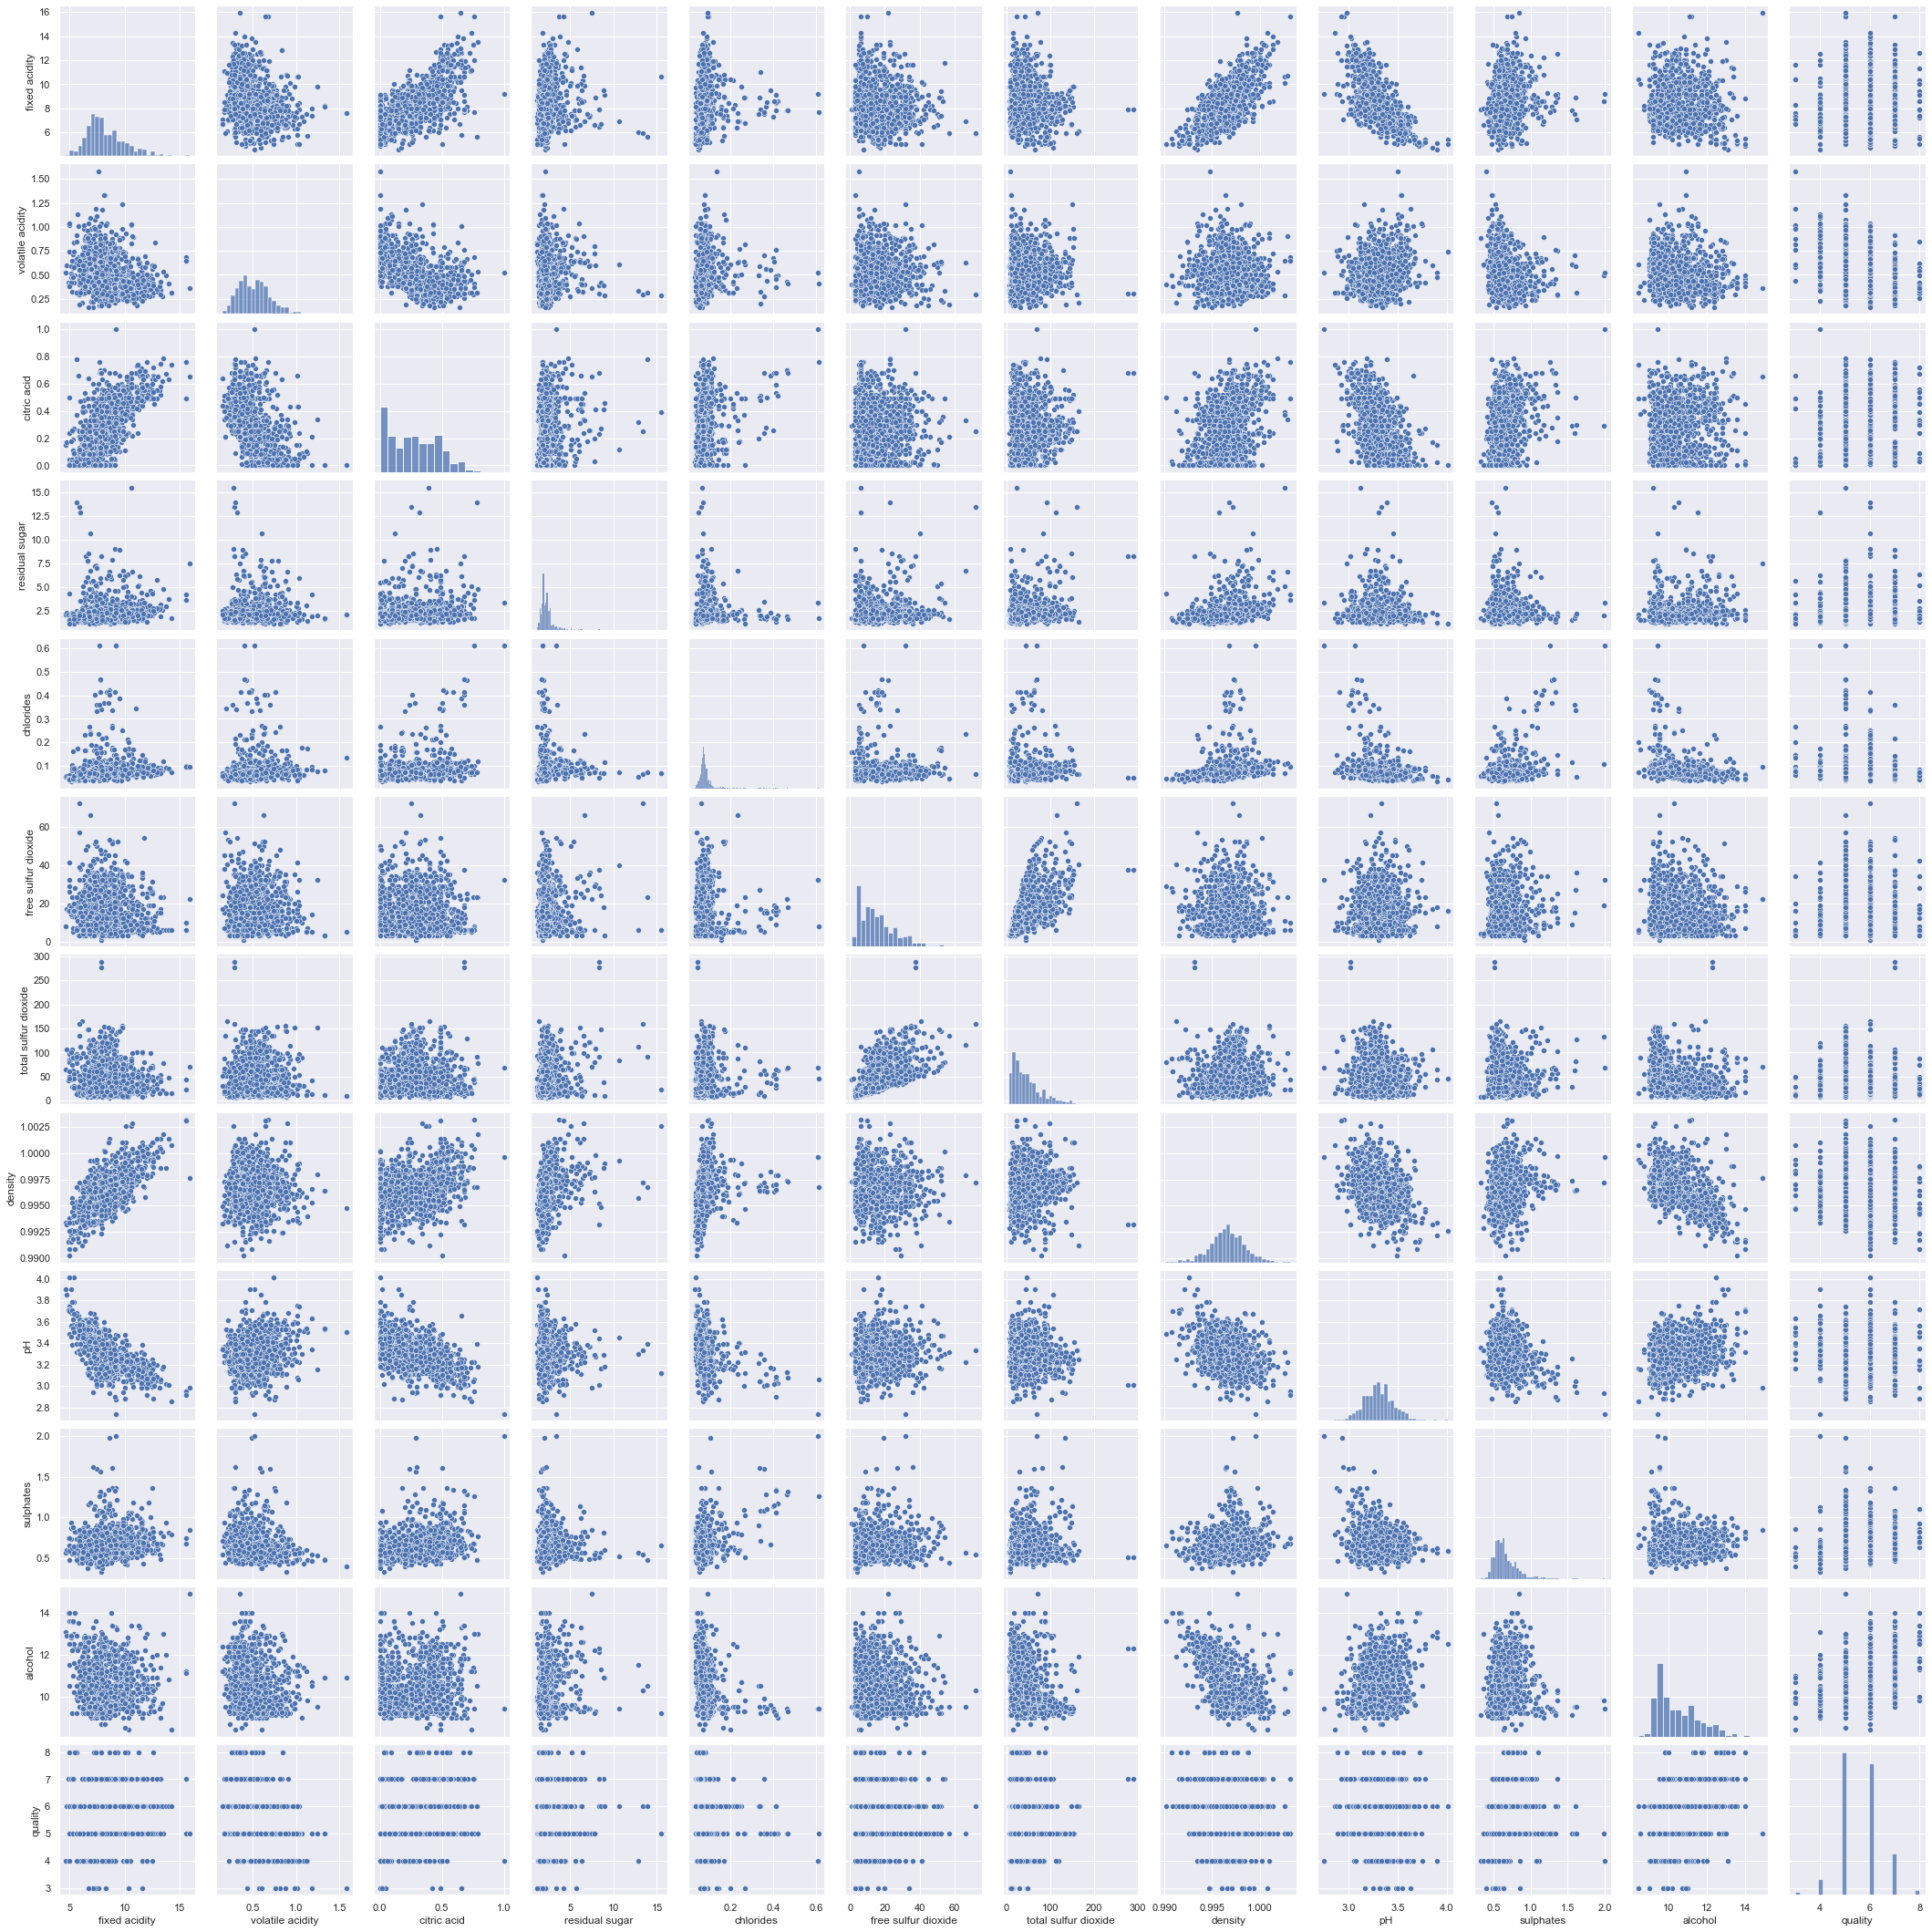

In [23]:
sns.set(rc = {'figure.figsize':(5,20)})
sns.pairplot(df)
plt.show()

In [24]:
q_med = df['quality'].median()
q_mean = df['quality'].mean()
q_mode = df['quality'].mode()

c:\users\hritika kathuria\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


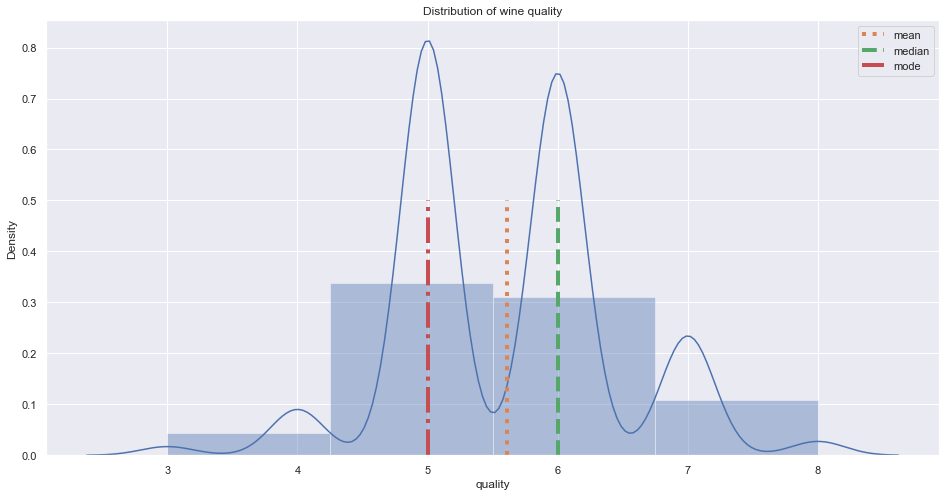

In [26]:
plt.figure(figsize = (16, 8))

sns.distplot(df['quality'], bins=4)

y = np.linspace(0, 0.5, 10)
plt.plot([q_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([q_med] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([q_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of wine quality')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

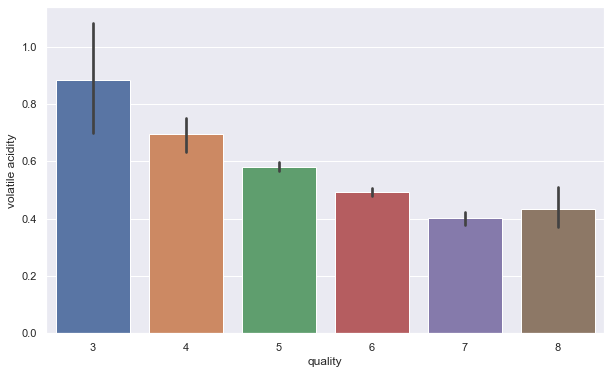

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

In [28]:
#according to correlation matrix, we keep the following features
keeped_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

In [29]:
# a new variable - "wine rating" which can be "good" (1) or "bad"(0) - when quality of wine will be more or less then 6.5
df['wine_rating'] = 0

In [32]:
df.loc[df['quality'] > 6.5, 'wine_rating'] = 1

In [33]:
df['wine_rating'].value_counts()

0    985
1    154
Name: wine_rating, dtype: int64

In [34]:
X = df[keeped_features]
y = df['wine_rating']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=21)

In [36]:
X_train.shape, X_test.shape

((911, 4), (228, 4))

In [37]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [38]:
#instantiate the model
LogReg = LogisticRegression()

#fit the model using the training data
LogReg.fit(X_train, y_train)

#use model to make predictions on test data
y_pred = LogReg.predict(X_test)

In [39]:
LogReg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy is : {:.2f}%".format(LogReg_acc * 100))

Test accuracy is : 89.04%


In [40]:
# #print classification report for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       197
           1       0.71      0.32      0.44        31

    accuracy                           0.89       228
   macro avg       0.81      0.65      0.69       228
weighted avg       0.88      0.89      0.87       228



TrueNegative:  193
FalseNegative:  21
TruePositive:  10
FalsePositive:  4


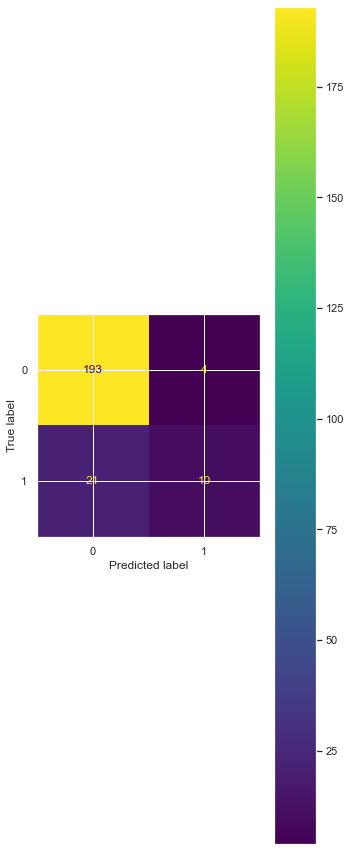

In [42]:
cfm = confusion_matrix(y_test, y_pred, labels=LogReg.classes_)
cfm_disp = ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=LogReg.classes_)
cfm_disp.plot()

print("TrueNegative: ", cfm[0][0])
print("FalseNegative: ", cfm[1][0])
print("TruePositive: ", cfm[1][1])
print("FalsePositive: ", cfm[0][1])


In [54]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df.iloc[:,:-1]=std.fit_transform(df.iloc[:,:-1]) #Standardize data set except dependent value(Quality feature)


In [55]:
#Assigning dataframe to list of array values
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values


In [56]:


#Split the data set in the ratio of 80:20 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)


In [57]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [58]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8202


In [60]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8749


In [62]:
#checking for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8749
Test set score: 0.8202


In [63]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[187   1]
 [ 40   0]]

True Positives(TP) =  187

True Negatives(TN) =  0

False Positives(FP) =  1

False Negatives(FN) =  40


<AxesSubplot:>

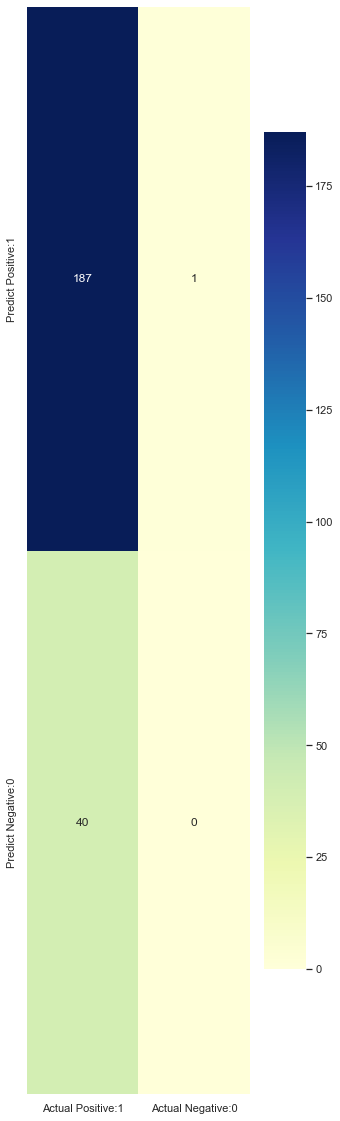

In [64]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       188
           1       0.00      0.00      0.00        40

    accuracy                           0.82       228
   macro avg       0.41      0.50      0.45       228
weighted avg       0.68      0.82      0.74       228

